In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


In [2]:
df = pd.read_csv("Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,7.50,124.97,68.66,6.63,264.84,115.80,53.32,13.90
std,2.82,15.33,27.99,6.65,147.38,23.68,16.20,2.62
min,0.00,77.00,21.00,0.00,10.00,24.00,25.00,10.00
25%,5.39,115.00,42.75,0.00,139.00,100.00,39.75,12.00
50%,7.49,125.00,69.00,5.00,272.00,117.00,54.50,14.00
75%,9.32,135.00,91.00,12.00,398.50,131.00,66.00,16.00
max,16.27,175.00,120.00,29.00,509.00,191.00,80.00,18.00


In [5]:
df.drop(['Sales', 'CompPrice', 'Income', 'Advertising',], axis="columns", inplace=True)

In [6]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

ShelveLoc : ['Bad' 'Good' 'Medium']
Urban : ['Yes' 'No']
US : ['Yes' 'No']


In [7]:
df['US'] = df.US.astype("category").cat.codes

# Data Visualisation

In [8]:
df.US.value_counts()

1    258
0    142
Name: US, dtype: int64

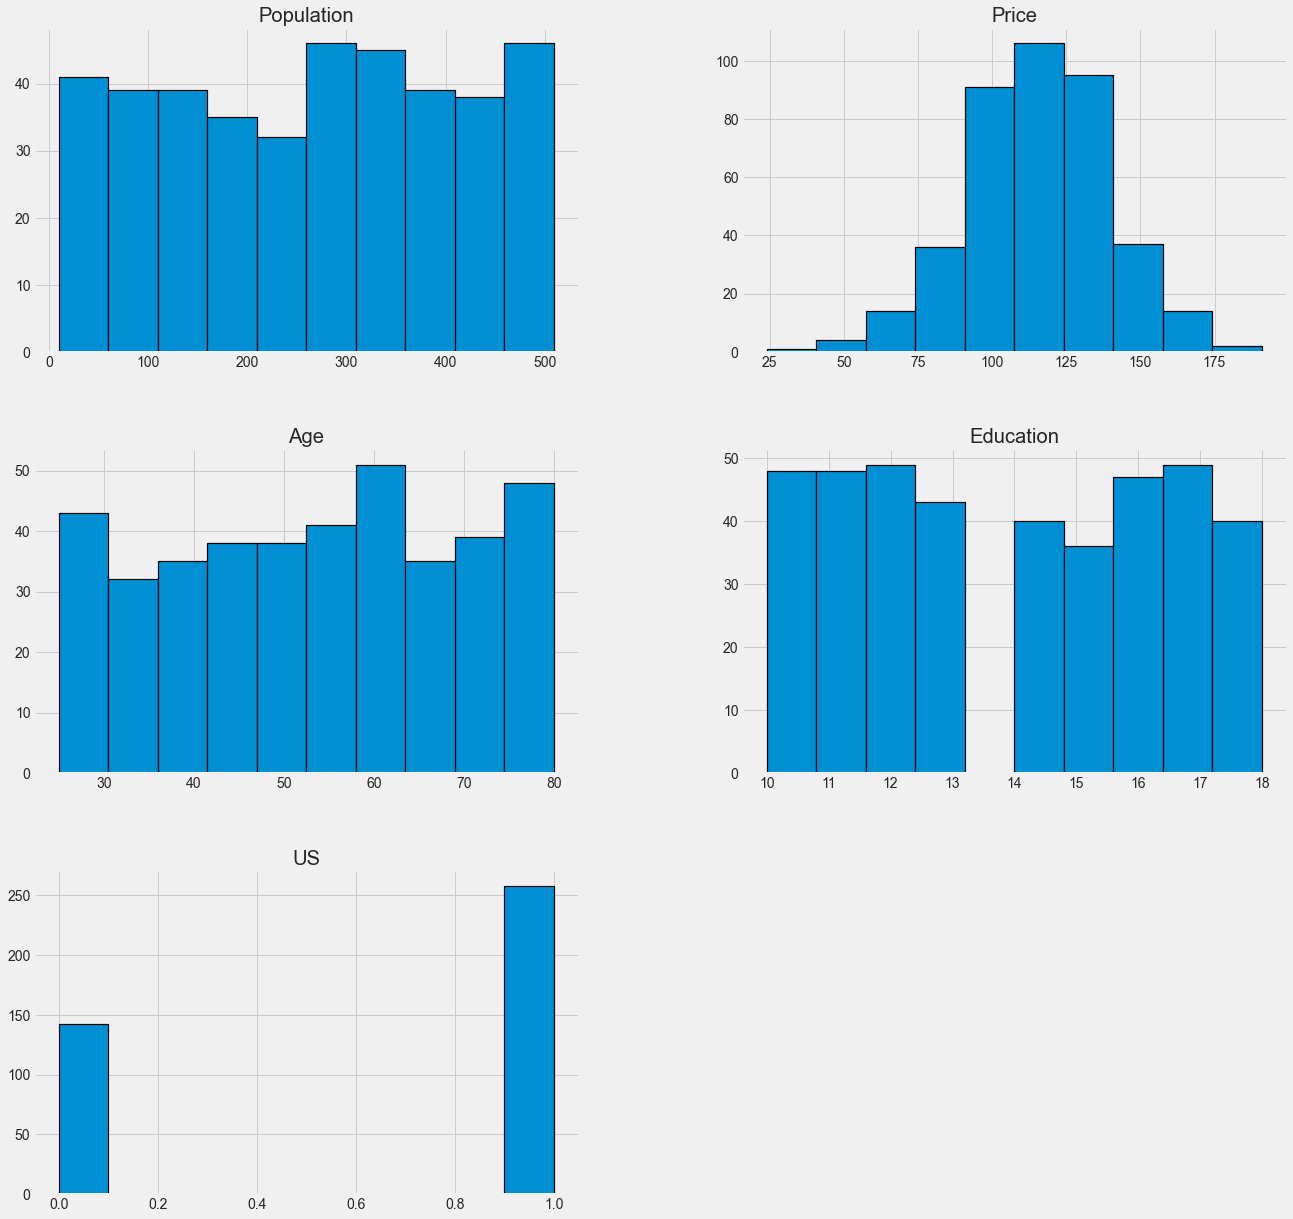

In [9]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

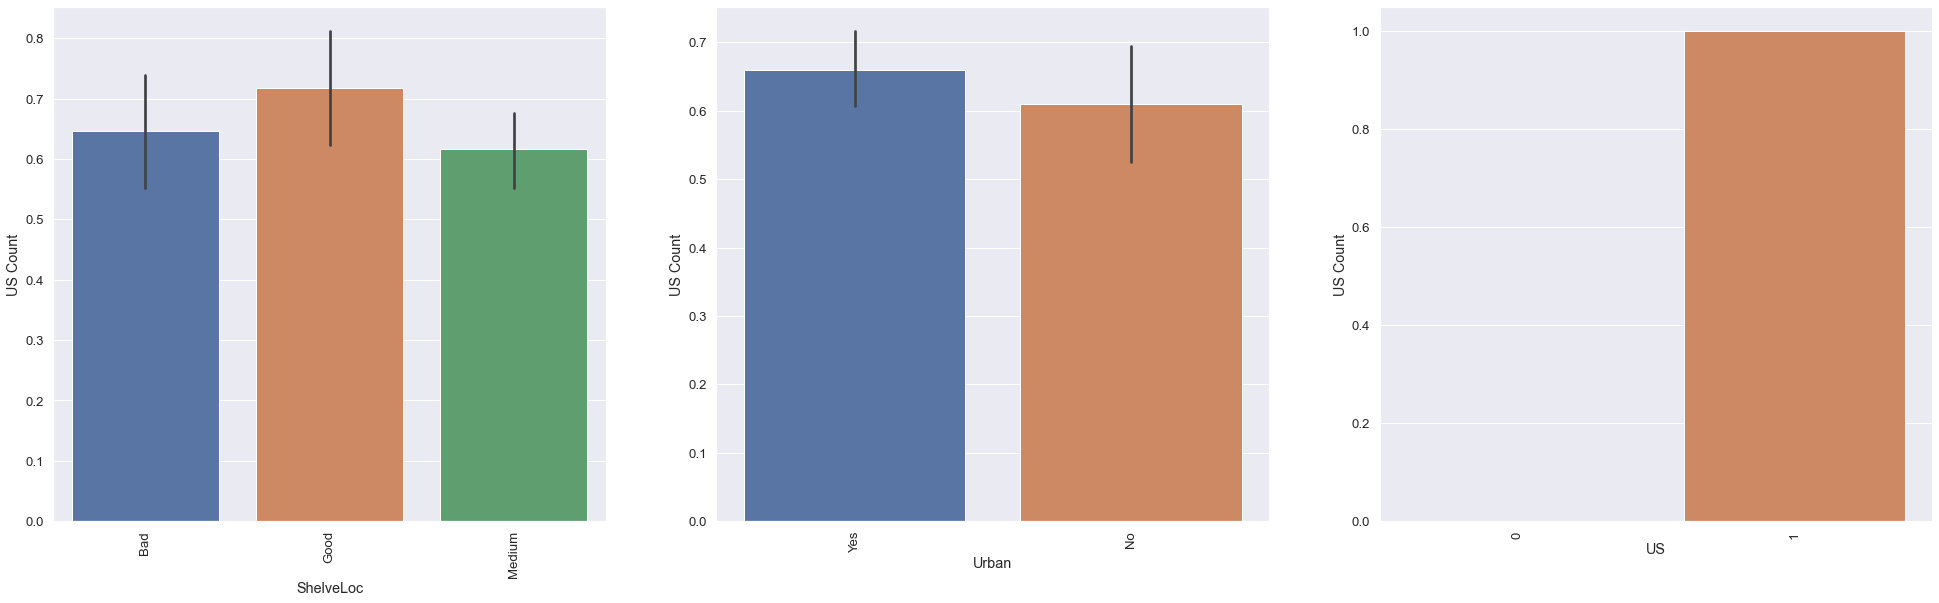

In [10]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='US', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('US Count')
    plt.xlabel(f'{column}')

# Correlation Matrix

<AxesSubplot:>

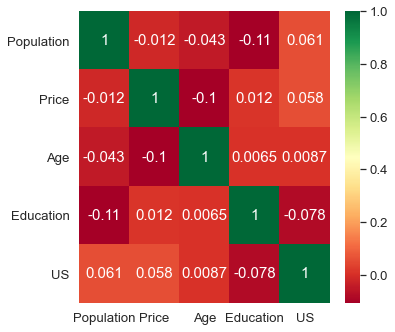

In [11]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

# Data Processing

In [12]:
categorical_col.remove('US')

In [13]:
# Transform categorical data into dummies
# categorical_col.remove("Attrition")
# data = pd.get_dummies(df, columns=categorical_col)
# data.info()
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('US', axis=1)
y = df.US

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Applying machine learning algorithms¶

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


In [16]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   106.00 174.00      1.00     280.00        280.00
_______________________________________________
Confusion Matrix: 
 [[106   0]
 [  0 174]]

Test Result:
Accuracy Score: 55.83%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.30  0.70      0.56       0.50          0.58
recall     0.36  0.64      0.56       0.50          0.56
f1-score   0.33  0.67      0.56       0.50          0.57
support   36.00 84.00      0.56     120.00        120.00
_______________________________________________
Confusion Matrix: 
 [[13 23]
 [30 54]]



 Decision Tree Classifier Hyperparameter tuning

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)


Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 6, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 64.64%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.89   0.64      0.65       0.76          0.73
recall      0.08   0.99      0.65       0.53          0.65
f1-score    0.14   0.78      0.65       0.46          0.54
support   106.00 174.00      0.65     280.00        280.00
_______________________________________________
Confusion Matrix: 
 [[  8  98]
 [  1 173]]

Test Result:
Accuracy Score: 68.33%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.25  0.70      0.68       0.47          0.56
recall     0.03  0.96      0.68       0.50          0.68
f1-score   0.05  0.81      0.68       0

Visualization of a tree

In [21]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns)
features.remove("US")

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [22]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

NameError: name 'StringIO' is not defined

# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   106.00 174.00      1.00     280.00        280.00
_______________________________________________
Confusion Matrix: 
 [[106   0]
 [  0 174]]

Test Result:
Accuracy Score: 56.67%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.25  0.68      0.57       0.47          0.55
recall     0.22  0.71      0.57       0.47          0.57
f1-score   0.24  0.70      0.57       0.47          0.56
support   36.00 84.00      0.57     120.00        120.00
_______________________________________________
Confusion Matrix: 
 [[ 8 28]
 [24 60]]



# Random Forest hyperparameter tuning
a) Randomized Search Cross Validation

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': True})
Train Result:
Accuracy Score: 87.86%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.97   0.84      0.88       0.91          0.89
recall      0.70   0.99      0.88       0.84          0.88
f1-score    0.81   0.91      0.88       0.86          0.87
support   106.00 174.00      0.88     280.00        280.00
_______________________________________________
Confusion Matrix: 
 [[ 74  32]
 [  2 172]]

Test Result:
Accuracy Score: 63.33%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.30  0.70      0.63       0.50          0.58
recall     0.17  0.83      0.63       0.50          0.63
f1-score   0.21  0

b) Grid Search Cross Validation

In [25]:
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)


Fitting 3 folds for each of 768 candidates, totalling 2304 fits
Best parameters: {'bootstrap': False, 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Train Result:
Accuracy Score: 65.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   0.64      0.65       0.82          0.78
recall      0.08   1.00      0.65       0.54          0.65
f1-score    0.14   0.78      0.65       0.46          0.54
support   106.00 174.00      0.65     280.00        280.00
_______________________________________________
Confusion Matrix: 
 [[  8  98]
 [  0 174]]

Test Result:
Accuracy Score: 68.33%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.25  0.70      0.68       0.47          0.56
recall     0.03  0.96      0.68       0.50          0.68
f1-score   0.05  